In [1]:
pip install psycopg2-binary

Note: you may need to restart the kernel to use updated packages.


In [18]:
import psycopg2
import matplotlib.pyplot as plt
import datetime
x_list=[]
y_list=[]
connection = psycopg2.connect(
            host="aliyun-medbot.rwlb.rds.aliyuncs.com",
            database="beijing3th-jingzhou-timedelay-logs",
            user="yuzt_mysql",
            password="Medbot8848",
            port="5432"  # 默认是5432，如果使用默认可以省略
        )
print (connection)

<connection object at 0x000001F76FC07CA8; dsn: 'user=yuzt_mysql password=xxx dbname=beijing3th-jingzhou-timedelay-logs host=aliyun-medbot.rwlb.rds.aliyuncs.com port=5432', closed: 0>


In [19]:
cursor = connection.cursor()
cursor.execute("SELECT version();") # 查询PostgreSQL版本
record = cursor.fetchone()
print(record)
cursor.execute("SELECT * FROM _2024_05_15_networkrecord_log ORDER BY timestamp ASC LIMIT 2;")
timeResults=cursor.fetchall()
print(timeResults)
for time in timeResults:
    print(time[0])
    
cursor.execute("SELECT * FROM _2024_05_15_networkrecord_log ORDER BY timestamp ASC;")
timeResults=cursor.fetchall()
for time in timeResults:
    x_list.append(time[0])
    y_list.append(time[1])


('PostgreSQL 14.11',)
[(datetime.datetime(2024, 5, 15, 8, 16, 56, 155000, tzinfo=datetime.timezone(datetime.timedelta(seconds=28800))), Decimal('24')), (datetime.datetime(2024, 5, 15, 8, 16, 56, 309000, tzinfo=datetime.timezone(datetime.timedelta(seconds=28800))), Decimal('25'))]
2024-05-15 08:16:56.155000+08:00
2024-05-15 08:16:56.309000+08:00


104964 104964


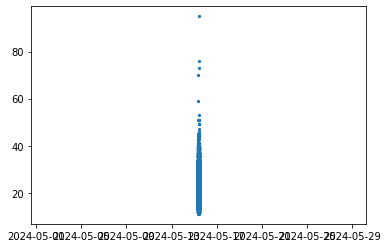

In [22]:
import numpy as np
print(len(x_list),len(y_list))
xarray=np.array(x_list)
yarray=np.array(y_list)
sizes=5

plt.scatter(xarray, yarray, s=sizes)
plt.show()